# Performance of phones

## Introduction
This data set if from M-kopa. A company that deals with energy and Utility and give different products that they offer on Pay as you go. The company gives different types of products such as phones.The main focus is on the different types of phones that they issue like Samsung and Nokia.
## Project Objectives
- To find out which brand of phones that customers prefer
- To find out the regions had the highest phones
- To find out which teams sold the highest phones

## Example of the Dataset being worked on
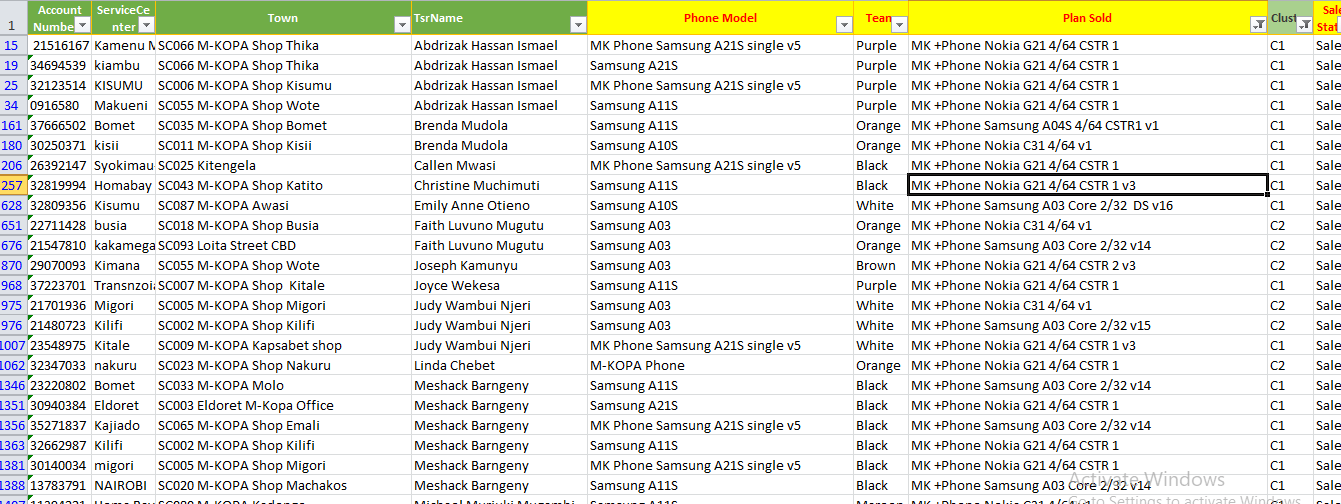

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
Data=pd.read_csv("SarahFinal.csv")
Data.head(10)

,Account Number1,ServiceCenter,Town,TsrName,Phone Model,Team,Plan Sold,Cluster,Sale Status,Product,Interested,Buy
0,21516167,Kamenu Makongeni,SC066 M-KOPA Shop Thika,Abdrizak Hassan Ismael,MK Phone Samsung A21S single v5,Purple,MK +Phone Nokia G21 4/64 CSTR 1,C1,Sale,Phone - No Trade In,Interested,Will Buy - Tomorrow
1,34694539,kiambu,SC066 M-KOPA Shop Thika,Abdrizak Hassan Ismael,Samsung A21S,Purple,MK +Phone Nokia G21 4/64 CSTR 1,C1,Sale,Phone - No Trade In,Interested,Will Buy - Next Week
2,32123514,KISUMU,SC006 M-KOPA Shop Kisumu,Abdrizak Hassan Ismael,MK Phone Samsung A21S single v5,Purple,MK +Phone Nokia G21 4/64 CSTR 1,C1,Sale,Phone - No Trade In,Interested,Will Buy - This Week
3,916580,Makueni,SC055 M-KOPA Shop Wote,Abdrizak Hassan Ismael,Samsung A11S,Purple,MK +Phone Nokia G21 4/64 CSTR 1,C1,Sale,Phone - No Trade In,Interested,Will Buy - Today
4,37666502,Bomet,SC035 M-KOPA Shop Bomet,Brenda Mudola,Samsung A11S,Orange,MK +Phone Samsung A04S 4/64 CSTR1 v1,C1,Sale,Phone - No Trade In,Interested,Will Buy - This Week
5,30250371,kisii,SC011 M-KOPA Shop Kisii,Brenda Mudola,Samsung A10S,Orange,MK +Phone Nokia C31 4/64 v1,C1,Sale,Phone - No Trade In,Interested,Will Buy - Next Week
6,26392147,Syokimau-Mulolongo,SC025 Kitengela,Callen Mwasi,MK Phone Samsung A21S single v5,Black,MK +Phone Nokia G21 4/64 CSTR 1,C1,Sale,Phone - No Trade In,Interested,Will Buy - This Week
7,32819994,Homabay,SC043 M-KOPA Shop Katito,Christine Muchimuti,Samsung A11S,Black,MK +Phone Nokia G21 4/64 CSTR 1 v3,C1,Sale,Phone - No Trade In,Interested,Will Buy - Today
8,32809356,Kisumu,SC087 M-KOPA Awasi,Emily Anne Otieno,Samsung A10S,White,MK +Phone Samsung A03 Core 2/32 DS v16,C1,Sale,Phone - No Trade In,Interested,Will Buy - Today
9,22711428,busia,SC018 M-KOPA Shop Busia,Faith Luvuno Mugutu,Samsung A03,Orange,MK +Phone Nokia C31 4/64 v1,C2,Sale,Phone - No Trade In,Interested,Will Buy - This Week


In [85]:
#Data.drop_duplicates()
Data.isnull().any() # columns with null values
#Data.head(10)

Account Number1    False
ServiceCenter      False
Town               False
TsrName            False
Phone Model        False
Team               False
Plan Sold          False
Cluster            False
Sale Status        False
Product            False
Interested         False
Buy                False
dtype: bool

In [86]:
#Data.info()
#Data.info()
#Data_dropped=pd.DataFrame(Data.drop(Data.columns[[1,4,10,11]], axis=1, inplace=True))
#Data_dropped.head()
Data_drop=pd.DataFrame(Data.iloc[:, [0,2,3,5,6]])
print(Data_drop.head())

   Account Number1                      Town                 TsrName    Team  \
0         21516167   SC066 M-KOPA Shop Thika  Abdrizak Hassan Ismael  Purple   
1         34694539   SC066 M-KOPA Shop Thika  Abdrizak Hassan Ismael  Purple   
2         32123514  SC006 M-KOPA Shop Kisumu  Abdrizak Hassan Ismael  Purple   
3           916580    SC055 M-KOPA Shop Wote  Abdrizak Hassan Ismael  Purple   
4         37666502   SC035 M-KOPA Shop Bomet           Brenda Mudola  Orange   

                              Plan Sold  
0       MK +Phone Nokia G21 4/64 CSTR 1  
1       MK +Phone Nokia G21 4/64 CSTR 1  
2       MK +Phone Nokia G21 4/64 CSTR 1  
3       MK +Phone Nokia G21 4/64 CSTR 1  
4  MK +Phone Samsung A04S 4/64 CSTR1 v1  


In [87]:
#Answering Objective three
team_numbers=Data_drop['Team'].value_counts()
print(team_numbers)

Black     8
Purple    7
Orange    5
White     4
Brown     1
Maroon    1
Name: Team, dtype: int64


26
[8 7 5 4 1 1]


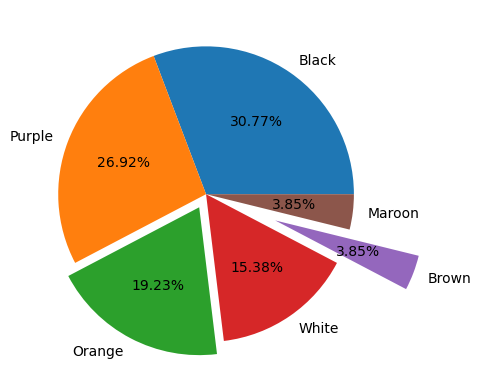

In [88]:
team_numbers=(Data_drop['Team'].value_counts()).to_numpy()
print(np.sum(team_numbers))
print(team_numbers)
plt.pie(team_numbers,labels=["Black","Purple","Orange","White","Brown","Maroon"],autopct="%1.2f%%",
       explode=[0,0,0.1,0,0.5,0])
plt.show()

In [89]:
#Answering Objective one
phonemodel_numbers=Data_drop['Plan Sold'].value_counts()
print(phonemodel_numbers)

MK +Phone Nokia G21 4/64 CSTR 1            10
MK +Phone Samsung A03 Core 2/32 v14         5
MK +Phone Nokia C31 4/64 v1                 4
MK +Phone Nokia G21 4/64 CSTR 1 v3          2
MK +Phone Samsung A04S 4/64 CSTR1 v1        1
MK +Phone Samsung A03 Core 2/32  DS v16     1
MK +Phone Nokia G21 4/64 CSTR 2 v3          1
MK +Phone Samsung A03 Core 2/32 v15         1
MK +Phone Samsung A23 4/64 CSTR1 v2         1
Name: Plan Sold, dtype: int64


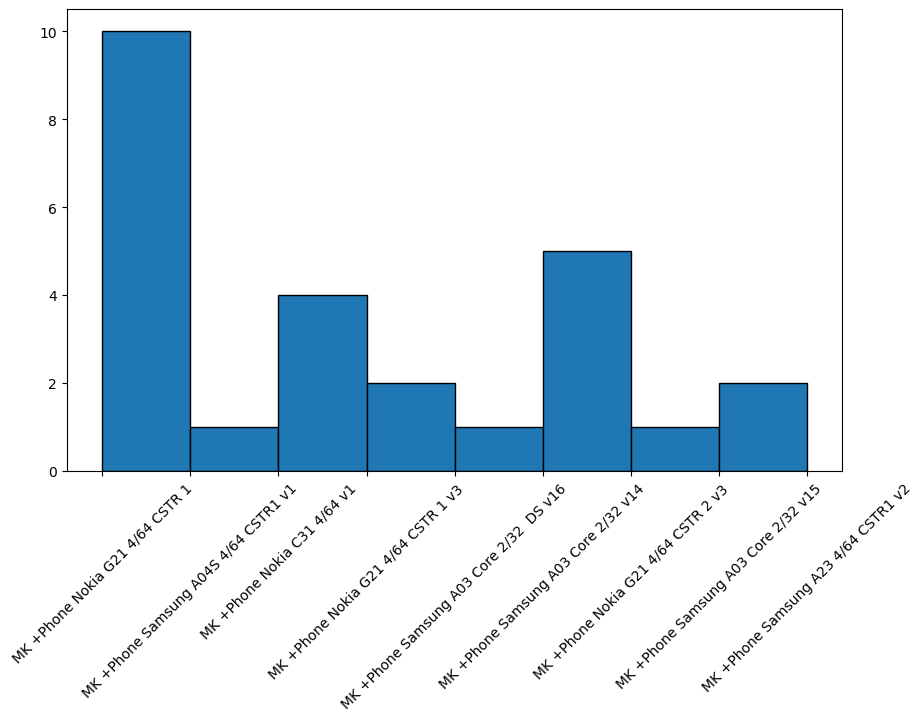

In [90]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
Data_drop['Plan Sold'].hist(grid=False, edgecolor='black', ax=ax,bins=8)
plt.xticks(rotation = 45)
plt.show()

In [77]:
Region=Data_drop['Town'].value_counts()
print(Region)

SC066 M-KOPA Shop Thika        2
SC002 M-KOPA Shop Kilifi       2
SC055 M-KOPA Shop Wote         2
SC035 M-KOPA Shop Bomet        2
SC093 Loita Street CBD         2
SC005 M-KOPA Shop Migori       2
SC020 M-KOPA Shop Machakos     1
SC065 M-KOPA Shop Emali        1
SC003 Eldoret M-Kopa Office    1
SC033 M-KOPA Molo              1
SC023 M-KOPA Shop Nakuru       1
SC009 M-KOPA Kapsabet shop     1
SC007 M-KOPA Shop  Kitale      1
SC006 M-KOPA Shop Kisumu       1
SC018 M-KOPA Shop Busia        1
SC087 M-KOPA Awasi             1
SC043 M-KOPA Shop Katito       1
SC025 Kitengela                1
SC011 M-KOPA Shop Kisii        1
SC080 M-KOPA Kadongo           1
Name: Town, dtype: int64


In [79]:
Region=(Data_drop['Town'].value_counts()).to_numpy()
print(np.sum(Region))

26


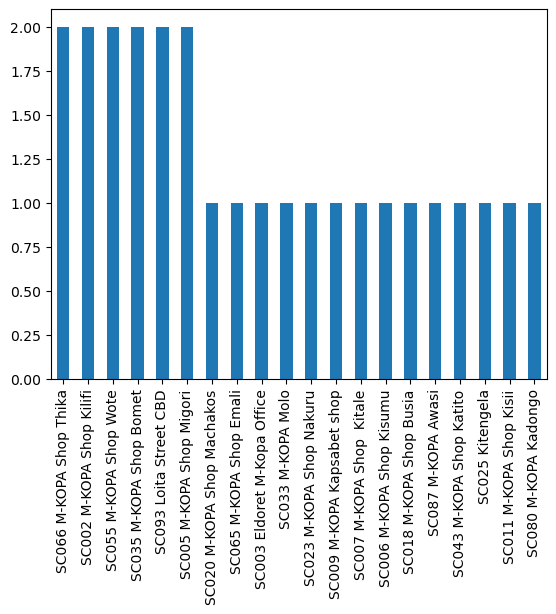

In [80]:
Data_drop.Town.value_counts().plot(kind='bar')
plt.show()